In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import cube as cube_lib
import solver as solver_lib

In [4]:
model = tf.keras.models.load_model('./model')

In [10]:
evaluation = solver_lib.evaluate_solver(
    lambda cube: solver_lib.GreedySolver(cube, model, 2),
    trajectory_length=8,
    max_num_steps=8,
    num_trials=10)

evaluation

KeyboardInterrupt: 

In [63]:
df = pd.DataFrame()

for greedy_depth in [1, 2, 3]:
    print('Starting greedy_depth {}'.format(greedy_depth))
    for trajectory_length in [5, 8, 11, 14, 17, 21]:
        print('Starting trajectory_length {}'.format(trajectory_length))
        eval_df = solver_lib.evaluate_solver(
            lambda cube: solver_lib.GreedySolver(cube, model, greedy_depth),
            trajectory_length=trajectory_length,
            max_num_steps=trajectory_length+2,
            num_trials=50)
        eval_df['greedy_depth'] = greedy_depth
        df = df.append(eval_df, ignore_index=True)
       

df

,num_steps_scrambled,num_steps_to_solve,solved,greedy_depth
0,5,3.0,True,1
1,5,3.0,True,1
2,5,5.0,True,1
3,5,5.0,True,1
4,5,1.0,True,1
...,...,...,...,...
895,21,NaN,False,3
896,21,NaN,False,3
897,21,9.0,True,3
898,21,NaN,False,3


In [64]:
gr = df.groupby(['num_steps_scrambled', 'greedy_depth']).agg(
    mean_steps_to_solve=pd.NamedAgg(column='num_steps_to_solve', aggfunc='mean'),
    prob_solved=pd.NamedAgg(column='solved', aggfunc='mean'))

gr

mean_steps_to_solve  prob_solved
num_steps_scrambled greedy_depth                                  
5                   1                        4.086957         0.92
                    2                        4.440000         1.00
                    3                        4.080000         1.00
8                   1                        6.275862         0.58
                    2                        6.195122         0.82
                    3                        6.625000         0.96
11                  1                        6.384615         0.26
                    2                        7.444444         0.54
                    3                        8.090909         0.66
14                  1                        8.000000         0.08
                    2                        8.142857         0.28
                    3                        9.263158         0.38
17                  1                        7.000000         0.02
                    2                        9.000000         0.06
                    3                       10.142857         0.14
21                  1                             NaN         0.00
                    2                       12.000000         0.04
                    3                       11.800000         0.10

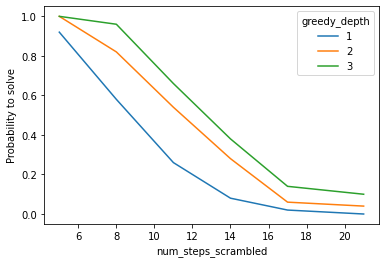

In [65]:
gr.prob_solved.unstack().plot()
_ = plt.ylabel('Probability to solve')

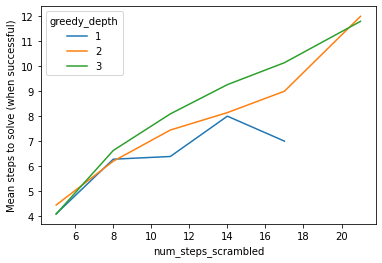

In [66]:
gr.mean_steps_to_solve.unstack().plot()
_ = plt.ylabel('Mean steps to solve (when successful)')